<a href="https://colab.research.google.com/github/Olivia7339/Objects_Detection/blob/main/TIP_Object_det_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('TPA')

Drive already mounted at TPA; to attempt to forcibly remount, call drive.mount("TPA", force_remount=True).


In [39]:
import sys
sys.path.insert(0,'/content/TPA/MyDrive/TPA')

In [40]:
!pip install ripser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import TDAimgprocess as TIP # topological image modification and processing
import os # os independent path construction 
import time # tracking computation time
import ripser
import random # setting seeds
import numpy as np # handling arrays and general math
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # handling images
import matplotlib
%matplotlib inline
import PIL # imaging library
from skimage.segmentation import chan_vese # chan_vese segmentation
from skimage.segmentation import slic # k-means clustering based oversegmentation
from skimage.filters import roberts # Roberts' cross operator for edge detection
from skimage.morphology import convex_hull_image # construct convex hull of a binary image
import skimage.filters as filters # infer ISODATA thresholds from images
from skimage.segmentation import active_contour # active contour segmentation 
import cv2 # binarize images
import numpy as np
import random
import pandas as pd
from PIL import Image
import scipy.misc
import os
import numpy as np



In [43]:
!pip install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import torch
print(torch.cuda.is_available())

False


In [45]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
# import all neccessary libraries.
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

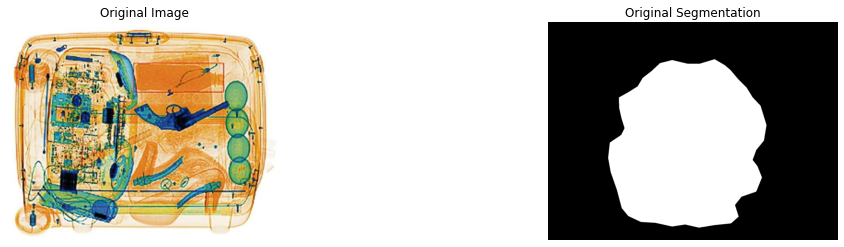

In [47]:
import os 
import matplotlib.image as mpimg # handling images
import os 
import matplotlib.image as mpimg # handling images
img = mpimg.imread(os.path.join("/content/TPA/MyDrive/TPA/lug4.JPG"))
sgm_truth = mpimg.imread(os.path.join("/content/TPA/MyDrive/TPA/Image/2.png"))

fig, axes = plt.subplots(1, 2, figsize=(18, 4))
ax = axes.flatten()

ax[0].imshow(img)
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(sgm_truth, cmap="gray")
ax[1].set_axis_off()
ax[1].set_title("Original Segmentation", fontsize=12)

plt.show()


Time for Topological Image Processing: 00:00:03


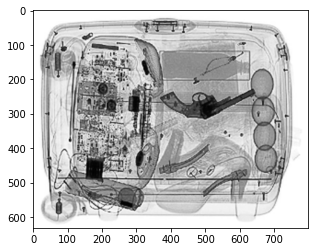

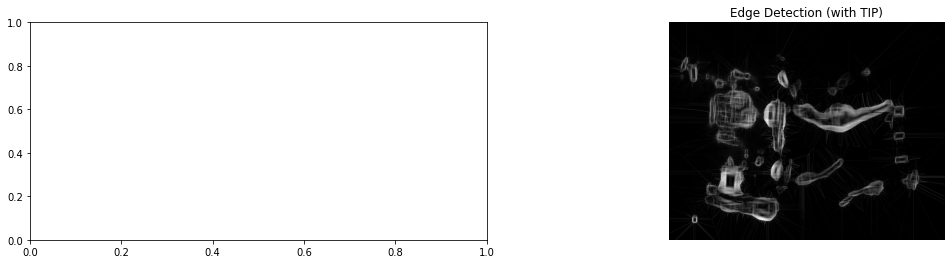

In [48]:
import time
window_size = 25
border_width = 25
#...
img_gray = np.asarray(PIL.Image.fromarray((img).astype(np.uint8)).convert("L")).copy().astype("float") # grayscale
img_gray += 0.01 * np.random.randn(*img_gray.shape) # random noise
start_time = time.time()
TIP_img = TIP.topological_process_img(img_gray, window_size=window_size, border_width=border_width)
elapsed_time = time.time() - start_time
print("Time for Topological Image Processing: " + time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

sgm_without_TIP, contours_without_TIP = TIP.contour_segmentation(img_gray, return_contours=True)
sgm_with_TIP, contours_with_TIP = TIP.contour_segmentation(TIP_img["processed"], return_contours=True)
random.seed(42)
#....



ax[0].imshow(sgm_without_TIP, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Edge Detection (without TIP)", fontsize=12)
ax[0].imshow(img_gray, cmap="gray")
for contour in contours_without_TIP:
    ax[0].plot(contour[:,1], contour[:,0], color="red")
ax[0].set_axis_off()
ax[0].set_title("Isocontour (without TIP)", fontsize=12)
plt.imshow(img_gray, cmap="gray")
plt.savefig('save_me.jpg')
#...

sgm_without_TIP = roberts(img_gray)
sgm_with_TIP = roberts(TIP_img["processed"])

#...


fig, axes = plt.subplots(1, 2, figsize=(18, 4))
ax = axes.flatten()

ax[1].imshow(sgm_with_TIP, cmap="gray")
ax[1].set_axis_off()
ax[1].set_title("Edge Detection (with TIP)", fontsize=12)

plt.show()


In [49]:
np.set_printoptions(threshold=np.inf)
np.set_printoptions(suppress=True)


In [50]:
def display_image(image, image_stage):
    plt.imshow(image, cmap='gray')
    plt.title(image_stage)
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [51]:
def transformation_function(intensity):
    if 0 <= intensity < 30:
        new_intensity = 10
    elif 30 <= intensity < 60:
        new_intensity = 20
    elif 60 <= intensity < 90:
        new_intensity = 50
    elif 90 <= intensity < 120:
        new_intensity = 70
    elif 120 <= intensity < 160:
        new_intensity = 100
    elif 160 <= intensity < 190:
        new_intensity = 140
    elif 190 <= intensity < 220:
        new_intensity = 180
    elif 220 <= intensity <= 255:
        new_intensity = 200
    return new_intensity


def convert_image():
    img = cv2.imread("save_me.jpg", 0)
    img_rows = img.shape[0]
    image_columns = img.shape[1]
    print("The shape of the input image is " + str(img_rows) + " x " + str(image_columns) + " pixels.")

    display_image(img, "Input Image")

    new_image = np.zeros([img.shape[0], img.shape[1]])
    for row in range(img_rows):
        for column in range(image_columns):
            input_intensity = img[row][column]
            output_intensity = transformation_function(input_intensity)
            new_image[row][column] = output_intensity

    new_image_rows = new_image.shape[0]
    new_image_columns = new_image.shape[1]
    print("The shape of the output image is " + str(new_image_rows) + " x " + str(new_image_columns) + " pixels.")
    
    display_image(new_image, "Output Image")
    plt.savefig('save_me.jpg')

The shape of the input image is 288 x 432 pixels.


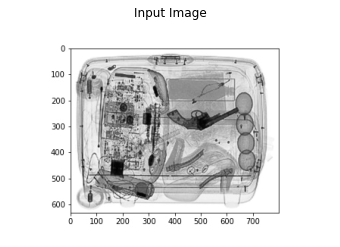

The shape of the output image is 288 x 432 pixels.


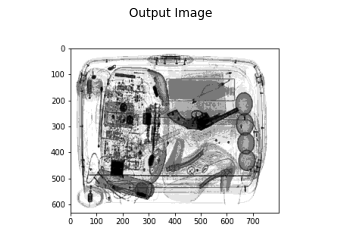

<Figure size 432x288 with 0 Axes>

In [52]:
convert_image()

In [53]:
original = img
original_const = original

In [54]:
im = Image.open("save_me.jpg")
rgb2xyz = (
    0.312453, 0.257580, 0.380423, 0,
    0.212671, 0.715160, 0.172169, 0,
    0.019334, 0.19193, 0.950227, 0 )
out = im.convert("RGB", rgb2xyz)
coloured = cv2.cvtColor(np.array(out), cv2.COLOR_RGB2BGR)

In [55]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)
   

### Color Correction

First of all, the green channel must be modified because it's too intense.



(<matplotlib.axes._subplots.AxesSubplot at 0x7f9a380dc690>,
 (-0.5, 799.5, 631.5, -0.5),
 Text(0.5, 1.0, 'Gamma = 1.1'))

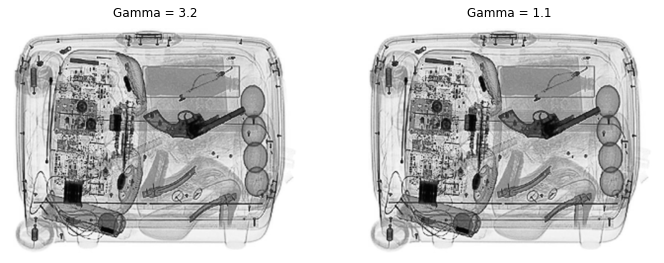

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
gamma = 7.9
adjusted = adjust_gamma(original, gamma=gamma)
plt.subplot(132), plt.imshow(adjusted),plt.imshow(img_gray, cmap="gray"), plt.axis('off'), plt.title('Gamma = 3.2')

gamma = 2.0
adjusted = adjust_gamma(original, gamma=gamma)
plt.subplot(133), plt.imshow(adjusted), plt.axis('off'),plt.imshow(img_gray, cmap="gray"), plt.title('Gamma = 1.1')


# Gama levels
These next few boxes are important becaues this is where we contol how light and dark we apply our correction.

Be warned not all correction will wrok the same.

some picture may look better with higher gamma and some may look better with low.

### Contrast & Brightness

Brightness factor must be carefully changed so that small details won't be overbrightened.

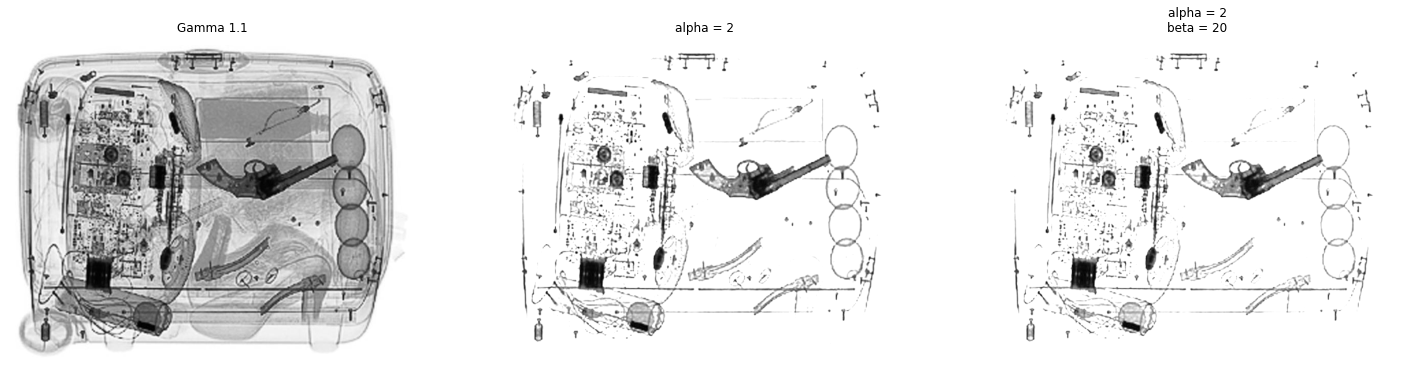

In [67]:
img = cv2.imread('/content/TPA/MyDrive/TPA/lug4.JPG',0) # loads in grayscale
fig, axes = plt.subplots(1, 3, figsize=(25,15))
plt.subplot(131), plt.imshow(img, cmap='gray'),plt.axis('off'), plt.title('Gamma 1.1')

alpha = 2.0
res = cv2.multiply(img, alpha)
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('alpha = 2')

beta = 30
res = cv2.add(res, beta)
plt.subplot(133), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('alpha = 2\nbeta = 20')

plt.show()

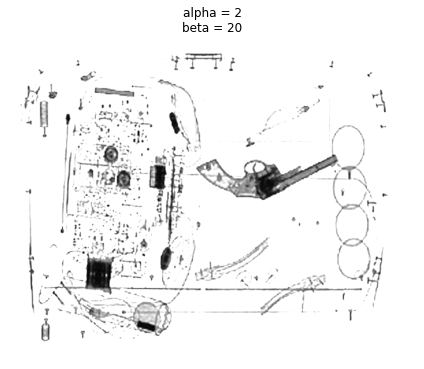

In [68]:
fig, axes = plt.subplots(1,  figsize=(25,15))
alpha = 2.0
res = cv2.multiply(img, alpha)
beta = 30
res = cv2.add(res, beta)
plt.subplot(133), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('alpha = 2\nbeta = 20')

plt.show()

# Now Combined All The Methods



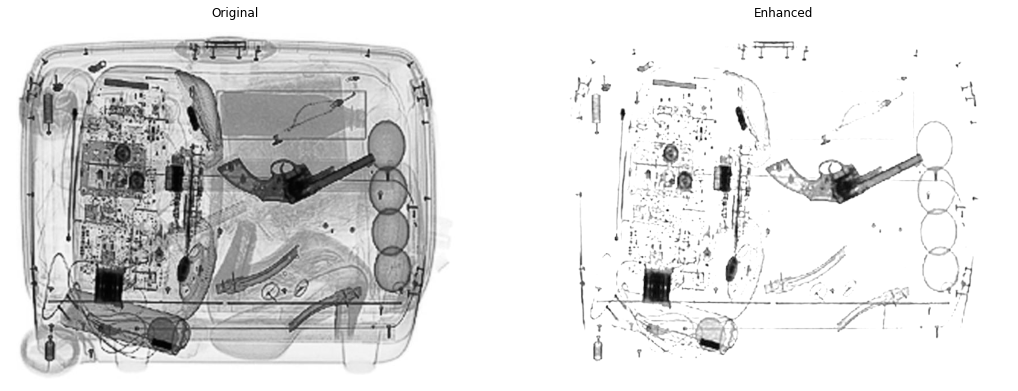

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Original')

adjusted = adjust_gamma(res, gamma=1.5)
plt.subplot(122), plt.imshow(adjusted, cmap='gray'), plt.axis('off'), plt.title('Enhanced')

plt.show()

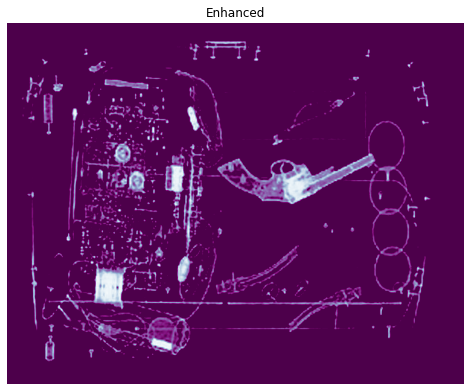

In [70]:
fig, axes = plt.subplots(1, figsize=(18,8))

adjusted = adjust_gamma(res, gamma=1.5)
plt.subplot(122), plt.imshow(adjusted, cmap='BuPu'), plt.axis('off'), plt.title('Enhanced')


fig.savefig('save_me.jpeg')

# This is where our object detection come into place

In [71]:
# makes some edits to the images that will be used to train.
custom_transforms = transforms.Compose([
transforms.ToPILImage(),
transforms.Resize(900),
transforms.RandomHorizontalFlip(0.5),
transforms.ColorJitter(saturation=0.2),
transforms.ToTensor(),
utils.normalize_transform(),
])

In [72]:
# set the path for the training and testing datasets.
Train_dataset=core.Dataset('/content/TPA/MyDrive/300_pistol_imgs/test',transform=custom_transforms)
Test_dataset = core.Dataset('/content/TPA/MyDrive/500_Pistol_Folder/500_pistol_imgs')

In [73]:
model = core.Model.load('/content/TPA/MyDrive/500_Pistol_Folder/500_pistol_imgs/new_model_weights.pth', ['pistol'])

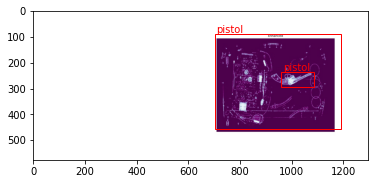

In [64]:
# read an image from the path and make predictions on it.
# the image will likely be covered in boxes.
image = utils.read_image('save_me.jpeg') 
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes, labels)

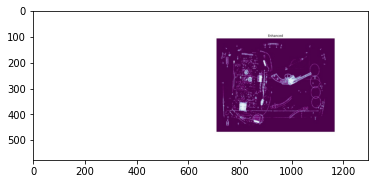

In [74]:
# remove the unwanted boxes with thresh.
# the higher the number, the less boxes. play with thresh until it looks good.
thresh=0.4
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)